In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [51]:
# Load data
train_data = pd.read_csv('data_processed/train.csv')
val_data = pd.read_csv('data_processed/val.csv')
test_data = pd.read_csv('data_processed/test.csv')
train_data

,home_team_id,away_team_id,result,away_expected_points,away_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,home_ppda,...,fouls,yellowcards,redcards,oppos_goals,oppos_shots,oppos_shotontarget,oppos_cornerkicks,oppos_fouls,oppos_yellowcards,oppos_redcards
0,89,84,3,0.4839,0.278076,17.947368,2,2.2359,1.166350,10.120000,...,-0.4,0.6,-0.2,2.000000,4.000000,3.666667,-1.000000,-1.666667,0.000000,0.000000
1,85,71,3,1.8322,0.909774,14.043478,4,0.8041,0.423368,4.125000,...,-1.2,0.0,0.2,0.666667,-3.000000,-2.000000,-0.333333,-1.666667,-2.000000,0.000000
2,76,77,1,0.6966,0.991901,13.687500,3,2.0358,1.683430,5.935484,...,-4.2,-1.4,0.0,0.666667,5.333333,1.333333,-2.000000,0.333333,-0.333333,0.000000
3,81,82,3,0.7136,1.017060,10.956522,3,2.0216,1.853100,11.250000,...,-0.6,-0.6,-0.2,1.333333,-2.333333,-1.333333,-0.333333,1.000000,-0.333333,-0.333333
4,87,74,0,1.5269,1.552480,11.138889,9,1.1777,1.331920,11.333333,...,-1.6,0.2,0.2,0.000000,-4.000000,-1.666667,0.333333,-2.333333,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,87,78,0,0.3992,0.772317,16.750000,1,2.4278,2.203480,5.391304,...,-1.6,-1.8,0.0,4.000000,7.666667,3.333333,1.333333,2.333333,0.000000,0.000000
2071,88,72,0,0.3316,1.072580,19.115385,3,2.5201,2.883550,10.000000,...,-0.2,1.2,0.4,1.666667,10.000000,3.666667,1.333333,1.333333,-1.666667,0.000000
2072,238,92,0,1.4201,0.558508,9.352941,10,1.1129,0.420006,8.653846,...,1.8,1.0,0.0,0.666667,3.333333,1.666667,3.000000,2.000000,0.000000,0.000000
2073,81,74,0,0.9417,1.351790,6.166667,10,1.8246,1.983440,17.764706,...,-2.6,0.4,0.0,1.000000,1.333333,2.333333,-1.000000,0.333333,0.000000,0.000000


In [52]:
val_data

,home_team_id,away_team_id,result,away_expected_points,away_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,home_ppda,...,fouls,yellowcards,redcards,oppos_goals,oppos_shots,oppos_shotontarget,oppos_cornerkicks,oppos_fouls,oppos_yellowcards,oppos_redcards
0,92,220,3,1.2564,1.685300,7.933333,7,1.4559,1.795480,17.888889,...,-3.4,-0.6,-0.4,-0.333333,-2.000000,0.333333,-0.666667,-2.666667,1.333333,0.000000
1,80,78,0,0.5141,0.321701,71.000000,3,2.2037,1.187090,6.595238,...,0.0,-1.0,0.2,2.666667,12.000000,5.666667,4.333333,2.666667,0.000000,0.000000
2,72,74,0,0.2455,0.580601,5.592593,6,2.6311,2.388630,6.869565,...,-0.6,-0.4,0.0,-0.333333,-4.666667,-1.333333,-2.333333,1.000000,-0.333333,0.333333
3,75,229,0,1.9451,1.327140,20.263158,7,0.7799,0.668082,11.500000,...,0.6,-0.6,0.0,0.333333,-1.000000,1.000000,-3.333333,1.666667,0.333333,0.333333
4,79,87,3,1.7064,1.787280,11.580645,13,1.0335,1.333300,25.666667,...,-1.4,1.2,0.4,-1.666667,-7.333333,-3.000000,-4.666667,-3.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,78,89,0,1.7546,0.782005,5.888889,5,0.8426,0.354618,15.500000,...,4.4,0.8,0.0,0.333333,-3.333333,0.333333,-3.666667,-6.333333,0.000000,0.000000
316,75,74,0,0.1395,1.051410,12.600000,5,2.7888,3.420580,12.437500,...,0.0,0.4,0.0,0.666667,8.666667,2.333333,3.000000,0.000000,0.333333,-0.333333
317,87,229,0,0.2766,1.117080,33.363636,4,2.6115,3.193850,10.280000,...,3.6,0.4,0.0,2.000000,6.000000,2.000000,1.000000,-3.333333,-0.333333,0.000000
318,88,71,0,0.0308,0.247841,23.500000,1,2.9495,3.320900,7.294118,...,-5.2,-0.2,0.0,1.333333,10.000000,3.000000,10.333333,0.000000,-0.333333,0.000000


In [53]:
test_data

,home_team_id,away_team_id,result,away_expected_points,away_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,home_ppda,...,fouls,yellowcards,redcards,oppos_goals,oppos_shots,oppos_shotontarget,oppos_cornerkicks,oppos_fouls,oppos_yellowcards,oppos_redcards
0,78,83,3,1.5584,1.436010,12.678571,13,1.1504,1.206370,10.250000,...,1.8,0.6,-0.2,0.333333,-2.666667,1.666667,-1.666667,-2.333333,-0.333333,0.000000
1,73,71,0,1.1567,0.488895,6.608696,11,1.4036,0.588341,11.680000,...,-0.2,0.8,0.0,1.000000,-2.000000,0.000000,-2.333333,-1.333333,0.000000,0.333333
2,72,80,3,2.4766,1.923150,6.192308,7,0.3517,0.541983,12.000000,...,-2.2,-1.0,0.4,-0.333333,-12.666667,-5.333333,-5.000000,-0.666667,0.666667,0.000000
3,228,87,1,2.2059,2.341110,6.333333,11,0.5808,1.268220,18.473684,...,2.8,0.2,0.0,0.000000,-5.666667,-1.666667,-5.333333,2.000000,1.333333,0.000000
4,245,229,0,1.5274,1.101190,10.647059,9,1.1560,0.889170,9.285714,...,8.0,0.6,0.4,0.000000,4.666667,0.000000,2.666667,-1.000000,0.333333,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,72,73,0,0.6810,0.432084,7.450000,4,2.0160,1.129330,13.884615,...,1.0,0.4,0.0,-2.333333,0.000000,-3.000000,-0.333333,2.333333,1.000000,0.000000
314,245,82,3,2.0183,2.033150,13.733333,5,0.7658,1.191510,8.689655,...,3.4,0.6,0.2,-2.000000,2.333333,-2.666667,-2.000000,1.666667,1.666667,0.333333
315,75,81,0,0.6372,0.970352,15.650000,8,2.1522,2.030130,14.666667,...,3.2,1.4,0.0,-0.333333,-4.000000,-2.333333,-4.666667,0.000000,-0.666667,0.333333
316,89,228,0,0.8456,1.881670,16.875000,8,1.9385,2.747660,7.677419,...,-0.8,1.2,0.0,0.666667,2.666667,1.000000,1.333333,0.000000,-1.000000,0.000000


In [54]:
#Result 3 to 2
train_data['result'] = train_data['result'].replace(3, 2)
val_data['result'] = val_data['result'].replace(3, 2)
test_data['result'] = test_data['result'].replace(3, 2)

In [55]:
# Kiểm tra trùng lặp giữa train và val
overlap_train_val = train_data.merge(val_data, how='inner')
print(f"Số hàng trùng lặp giữa train và val: {len(overlap_train_val)}")

# Kiểm tra trùng lặp giữa train và test
overlap_train_test = train_data.merge(test_data, how='inner')
print(f"Số hàng trùng lặp giữa train và test: {len(overlap_train_test)}")

# Kiểm tra trùng lặp giữa val và test
overlap_val_test = val_data.merge(test_data, how='inner')
print(f"Số hàng trùng lặp giữa val và test: {len(overlap_val_test)}")


Số hàng trùng lặp giữa train và val: 0
Số hàng trùng lặp giữa train và test: 0
Số hàng trùng lặp giữa val và test: 0


In [56]:
#Result count
train_data['result'].value_counts()

result
0    922
2    666
1    487
Name: count, dtype: int64

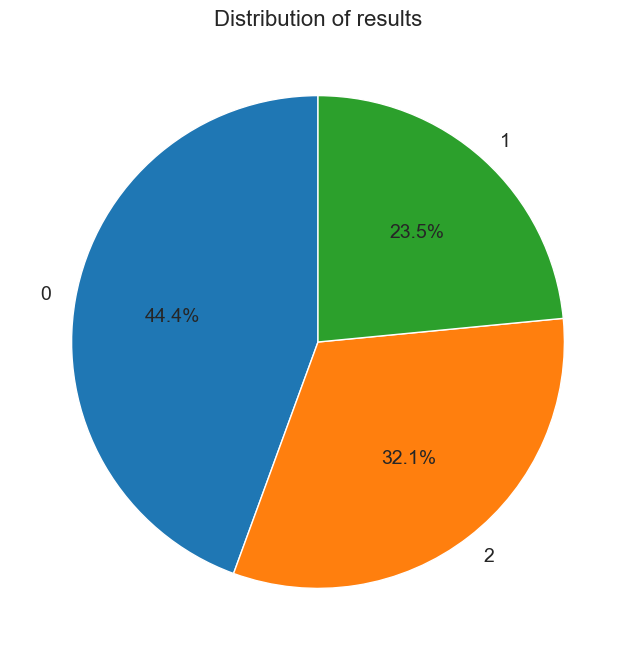

In [57]:
#result pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
train_data['result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Distribution of results', fontsize=16)
plt.ylabel('')
plt.show()

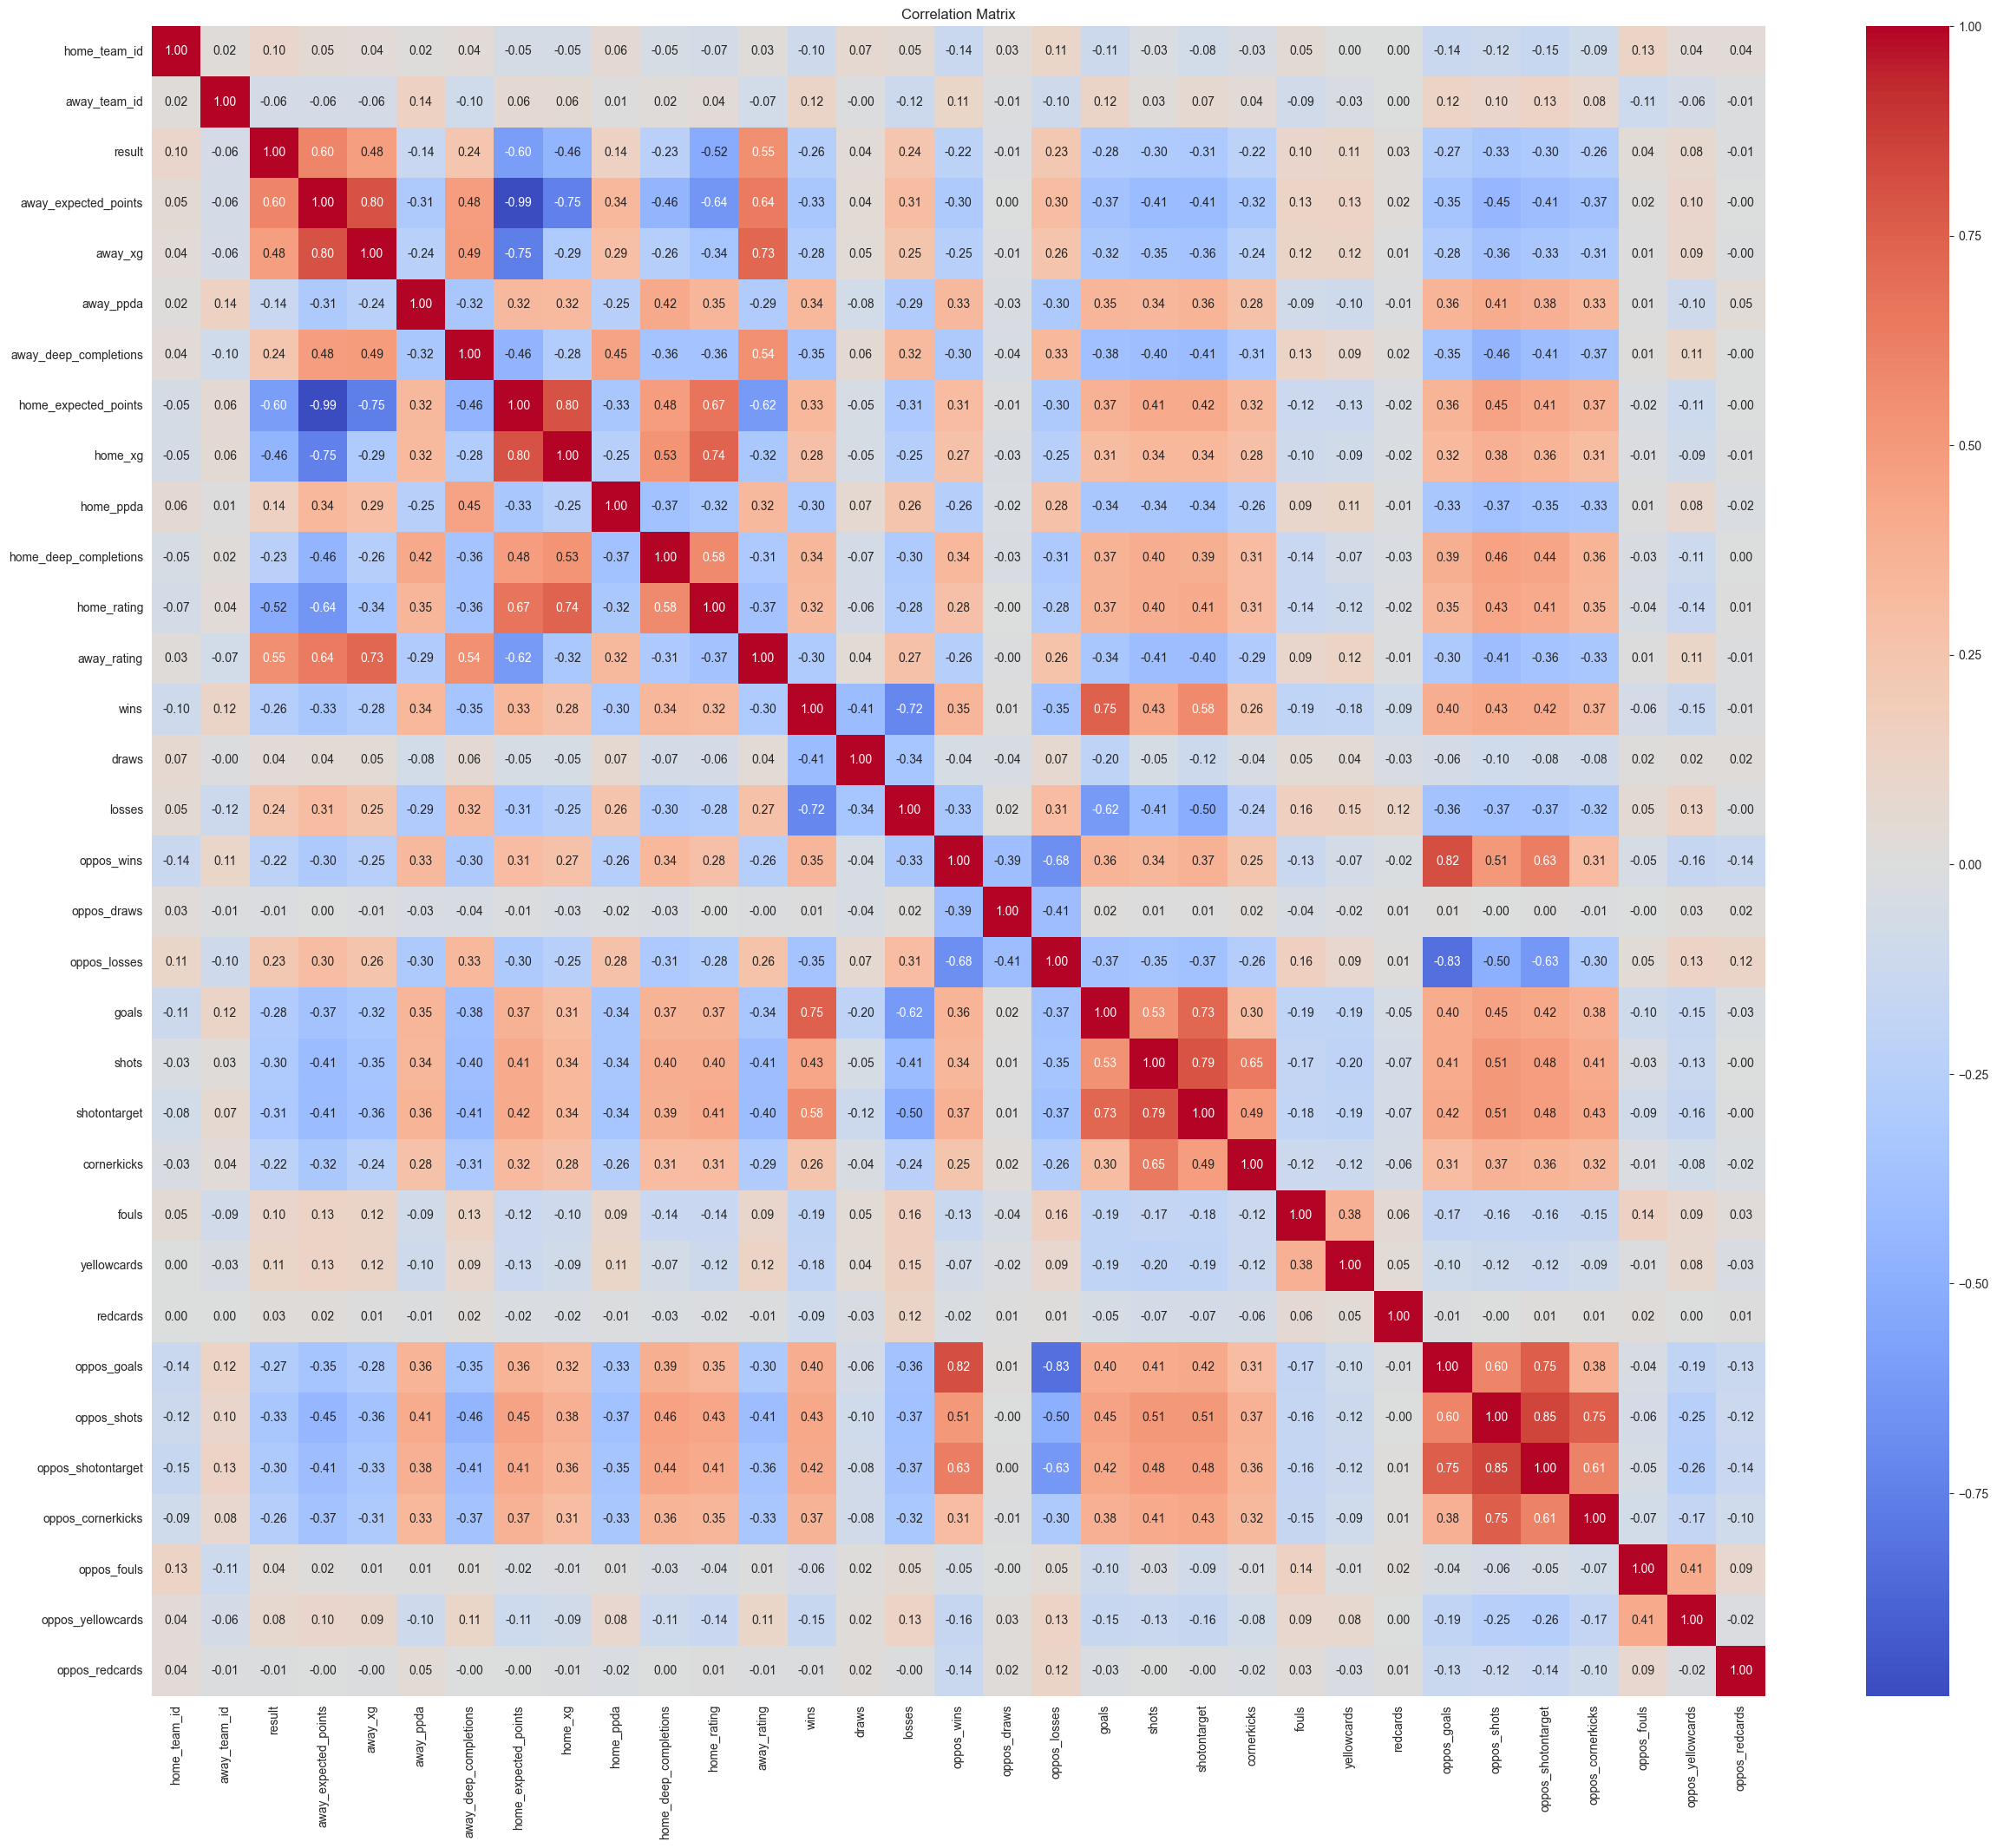

In [58]:
#correlation matrix
import seaborn as sns

plt.figure(figsize=(30, 25))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [59]:
# from sklearn.preprocessing import LabelEncoder
# 
# # #Date
# # train_data['Date'] = pd.to_datetime(train_data['Date'])
# # train_data['Weekday'] = train_data['Date'].dt.day
# # train_data['Month'] = train_data['Date'].dt.month
# # train_data['Year'] = train_data['Date'].dt.year
# # 
# # val_data['Date'] = pd.to_datetime(val_data['Date'])
# # val_data['Weekday'] = val_data['Date'].dt.day
# # val_data['Month'] = val_data['Date'].dt.month
# # val_data['Year'] = val_data['Date'].dt.year
# # 
# # test_data['Date'] = pd.to_datetime(test_data['Date'])
# # test_data['Weekday'] = test_data['Date'].dt.day
# # test_data['Month'] = test_data['Date'].dt.month
# # test_data['Year'] = test_data['Date'].dt.year
# # 
# # train_data = train_data.drop(columns=['Date'])
# # val_data = val_data.drop(columns=['Date'])
# # test_data = test_data.drop(columns=['Date'])
# 
# 
# # Mã hóa cột HomeTeam và AwayTeam
# label_encoder_home = LabelEncoder()
# label_encoder_away = LabelEncoder()
# 
# train_data['HomeTeam'] = label_encoder_home.fit_transform(train_data['HomeTeam'])
# train_data['AwayTeam'] = label_encoder_away.fit_transform(train_data['AwayTeam'])
# 
# val_data['HomeTeam'] = label_encoder_home.transform(val_data['HomeTeam'])
# val_data['AwayTeam'] = label_encoder_away.transform(val_data['AwayTeam'])
# 
# test_data['HomeTeam'] = label_encoder_home.transform(test_data['HomeTeam'])
# test_data['AwayTeam'] = label_encoder_away.transform(test_data['AwayTeam'])


In [60]:
# Prepare data
X_train = train_data.drop(columns=['result']).values
y_train = train_data['result'].values
X_val = val_data.drop(columns=['result']).values
y_val = val_data['result'].values
X_test = test_data.drop(columns=['result']).values
y_test = test_data['result'].values

In [61]:
train_data

,home_team_id,away_team_id,result,away_expected_points,away_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,home_ppda,...,fouls,yellowcards,redcards,oppos_goals,oppos_shots,oppos_shotontarget,oppos_cornerkicks,oppos_fouls,oppos_yellowcards,oppos_redcards
0,89,84,2,0.4839,0.278076,17.947368,2,2.2359,1.166350,10.120000,...,-0.4,0.6,-0.2,2.000000,4.000000,3.666667,-1.000000,-1.666667,0.000000,0.000000
1,85,71,2,1.8322,0.909774,14.043478,4,0.8041,0.423368,4.125000,...,-1.2,0.0,0.2,0.666667,-3.000000,-2.000000,-0.333333,-1.666667,-2.000000,0.000000
2,76,77,1,0.6966,0.991901,13.687500,3,2.0358,1.683430,5.935484,...,-4.2,-1.4,0.0,0.666667,5.333333,1.333333,-2.000000,0.333333,-0.333333,0.000000
3,81,82,2,0.7136,1.017060,10.956522,3,2.0216,1.853100,11.250000,...,-0.6,-0.6,-0.2,1.333333,-2.333333,-1.333333,-0.333333,1.000000,-0.333333,-0.333333
4,87,74,0,1.5269,1.552480,11.138889,9,1.1777,1.331920,11.333333,...,-1.6,0.2,0.2,0.000000,-4.000000,-1.666667,0.333333,-2.333333,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,87,78,0,0.3992,0.772317,16.750000,1,2.4278,2.203480,5.391304,...,-1.6,-1.8,0.0,4.000000,7.666667,3.333333,1.333333,2.333333,0.000000,0.000000
2071,88,72,0,0.3316,1.072580,19.115385,3,2.5201,2.883550,10.000000,...,-0.2,1.2,0.4,1.666667,10.000000,3.666667,1.333333,1.333333,-1.666667,0.000000
2072,238,92,0,1.4201,0.558508,9.352941,10,1.1129,0.420006,8.653846,...,1.8,1.0,0.0,0.666667,3.333333,1.666667,3.000000,2.000000,0.000000,0.000000
2073,81,74,0,0.9417,1.351790,6.166667,10,1.8246,1.983440,17.764706,...,-2.6,0.4,0.0,1.000000,1.333333,2.333333,-1.000000,0.333333,0.000000,0.000000


In [62]:
val_data

,home_team_id,away_team_id,result,away_expected_points,away_xg,away_ppda,away_deep_completions,home_expected_points,home_xg,home_ppda,...,fouls,yellowcards,redcards,oppos_goals,oppos_shots,oppos_shotontarget,oppos_cornerkicks,oppos_fouls,oppos_yellowcards,oppos_redcards
0,92,220,2,1.2564,1.685300,7.933333,7,1.4559,1.795480,17.888889,...,-3.4,-0.6,-0.4,-0.333333,-2.000000,0.333333,-0.666667,-2.666667,1.333333,0.000000
1,80,78,0,0.5141,0.321701,71.000000,3,2.2037,1.187090,6.595238,...,0.0,-1.0,0.2,2.666667,12.000000,5.666667,4.333333,2.666667,0.000000,0.000000
2,72,74,0,0.2455,0.580601,5.592593,6,2.6311,2.388630,6.869565,...,-0.6,-0.4,0.0,-0.333333,-4.666667,-1.333333,-2.333333,1.000000,-0.333333,0.333333
3,75,229,0,1.9451,1.327140,20.263158,7,0.7799,0.668082,11.500000,...,0.6,-0.6,0.0,0.333333,-1.000000,1.000000,-3.333333,1.666667,0.333333,0.333333
4,79,87,2,1.7064,1.787280,11.580645,13,1.0335,1.333300,25.666667,...,-1.4,1.2,0.4,-1.666667,-7.333333,-3.000000,-4.666667,-3.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,78,89,0,1.7546,0.782005,5.888889,5,0.8426,0.354618,15.500000,...,4.4,0.8,0.0,0.333333,-3.333333,0.333333,-3.666667,-6.333333,0.000000,0.000000
316,75,74,0,0.1395,1.051410,12.600000,5,2.7888,3.420580,12.437500,...,0.0,0.4,0.0,0.666667,8.666667,2.333333,3.000000,0.000000,0.333333,-0.333333
317,87,229,0,0.2766,1.117080,33.363636,4,2.6115,3.193850,10.280000,...,3.6,0.4,0.0,2.000000,6.000000,2.000000,1.000000,-3.333333,-0.333333,0.000000
318,88,71,0,0.0308,0.247841,23.500000,1,2.9495,3.320900,7.294118,...,-5.2,-0.2,0.0,1.333333,10.000000,3.000000,10.333333,0.000000,-0.333333,0.000000


# Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'newton-cg', 'saga'],  # Optimization algorithms
    'class_weight': [None, 'balanced']  # Class weights
}

# Set up GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', max_iter=5000, random_state=42),
    param_grid=param_grid_lr,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search_lr.best_params_)

# Evaluate the best model on the validation set
best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_val)
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_pred_lr))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:  {'C': 10, 'class_weight': None, 'solver': 'newton-cg'}
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       139
           1       0.36      0.14      0.20        72
           2       0.70      0.81      0.75       109

    accuracy                           0.68       320
   macro avg       0.59      0.60      0.58       320
weighted avg       0.63      0.68      0.64       320



C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Random Forest

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'classifier__bootstrap': True, 'classifier__class_weight': 'balanced', 'classifier__max_depth': 25, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.35      0.28      0.31        68
           2       0.62      0.73      0.67        99

    accuracy                           0.67       318
   macro avg       0.60      0.60      0.60       318
weighted avg       0.66      0.67      0.66       318



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

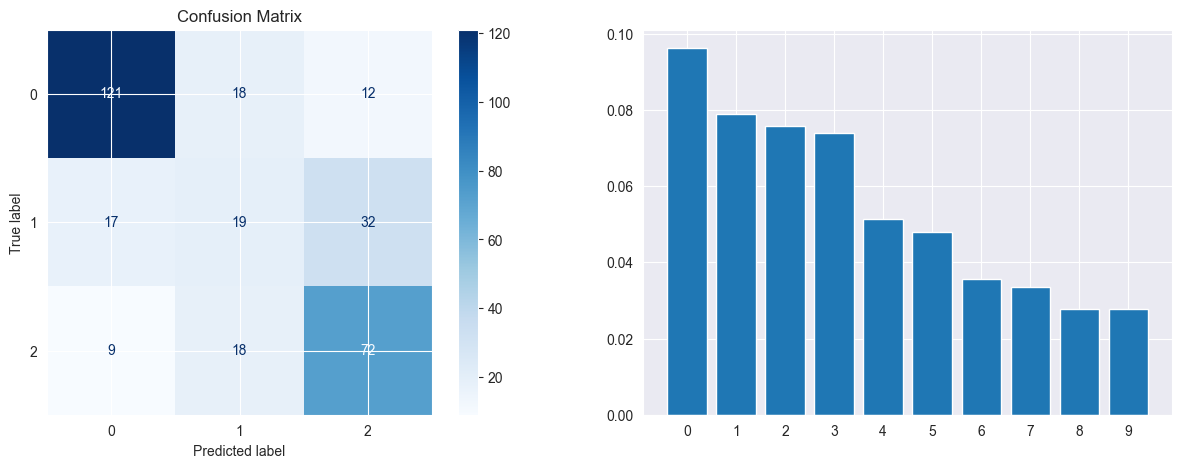

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Tính class weights tự động dựa trên tỷ lệ nghịch của số lượng mẫu
n_samples = np.array([922, 487, 666])
class_weights = dict(enumerate(n_samples.sum() / (n_samples * len(n_samples))))

# Tạo pipeline với SMOTE và RandomForest
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Định nghĩa tham số tìm kiếm
param_grid = {
    'classifier__n_estimators': [300, 400, 500],
    'classifier__max_depth': [15, 20, 25],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__class_weight': [class_weights, 'balanced'],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__bootstrap': [True]
}

# Thiết lập GridSearchCV với scoring phù hợp
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='balanced_accuracy',  # Sử dụng balanced_accuracy thay vì f1_macro
    verbose=1,
    n_jobs=-1
)

# Huấn luyện mô hình
grid_search.fit(X_train, y_train)

# Đánh giá kết quả
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Vẽ confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, ax=ax1, cmap='Blues')
ax1.set_title("Confusion Matrix")

# Feature Importance cho top 10 features
feature_imp = best_model.named_steps['classifier'].feature_importances_
indices = np.argsort(feature_imp)[::-1]
top_features = 10

ax2.bar(range(top_features), feature_imp[indices[:top_features]])
ax2.set_xticks(range(top_features))
ax2.set_xticklabels([X_train.columns[i] for i in indices[:top_features]], rotation=45, ha='right')
ax2.set_title("Top 10 Feature Importances")

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay
# 
# ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, cmap='Blues')
# plt.title("Confusion Matrix: Random Forest")
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
# import numpy as np
# 
# # Lấy kết quả từ GridSearchCV
# results = pd.DataFrame(grid_rf.cv_results_)
# 
# # Tạo dữ liệu trung bình điểm kiểm tra (Mean Test Accuracy) dựa trên n_estimators và max_depth
# pivot_table = results.pivot_table(
#     values='mean_test_score', 
#     index='param_max_depth', 
#     columns='param_n_estimators'
# )
# 
# # Biểu đồ 1: Biểu đồ đường (Line Plot)
# plt.figure(figsize=(10, 6))
# for depth in pivot_table.index:
#     plt.plot(pivot_table.columns, pivot_table.loc[depth], marker='o', label=f"max_depth={depth}")
# 
# plt.title('Impact of n_estimators and max_depth on Accuracy')
# plt.xlabel('Number of Estimators (n_estimators)')
# plt.ylabel('Mean Test Accuracy')
# plt.legend(title='Max Depth')
# plt.grid(True)
# plt.tight_layout()
# plt.show()
# 
# # Biểu đồ 2: Heatmap (Bản đồ nhiệt)
# plt.figure(figsize=(8, 6))
# sns.heatmap(
#     pivot_table,
#     annot=True,
#     fmt=".3f",
#     cmap="YlGnBu",
#     cbar_kws={'label': 'Mean Test Accuracy'}
# )
# plt.title('Heatmap of Grid Search results')
# plt.xlabel('Number of Estimators (n_estimators)')
# plt.ylabel('Max Depth')
# plt.tight_layout()
# plt.show()


In [ ]:
# # Random Forest
# best_rf = grid_rf.best_estimator_
# y_pred_rf = best_rf.predict(X_val)
# print("Accuracy for Random Forest:", accuracy_score(y_val, y_pred_rf))
# print(classification_report(y_val, y_pred_rf))

# XGBoost

In [65]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]
}

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid_xgb,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search_xgb.best_params_)

# Evaluate the best model on the validation set
best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_val)
print("Classification Report on Validation Set:")
print(classification_report(y_val, y_pred_xgb))

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       139
           1       0.46      0.18      0.26        72
           2       0.71      0.82      0.76       109

    accuracy                           0.70       320
   macro avg       0.64      0.62      0.61       320
weighted avg       0.66      0.70      0.66       320



C:\Users\ADMIN\OneDrive\Documents\Python\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:25:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# # XGBoost
# best_xgb = grid_xgb.best_estimator_
# y_pred_xgb = best_xgb.predict(X_val)
# print("Accuracy for XGBoost:", accuracy_score(y_val, y_pred_xgb))
# print(classification_report(y_val, y_pred_xgb))